In [ ]:
import pandas as pd

# Jika file CSV
df = pd.read_excel('label.xlsx')
# Mengubah nama kolom
df.columns = ['timestamp', 'username', 'comment', 'likeCount', 'label']
# Tampilkan data untuk melihat kolom-kolomnya
df.head()

,timestamp,username,comment,likeCount,label
0,2019-10-11T15:12:40Z,@MenjadiManusia,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",2506,netral
1,2019-10-11T17:47:05Z,@sandiikin,Manungsa = Manunggaling Rasa,26,netral
2,2019-10-12T01:58:29Z,@staypray8954,Tertata sekali... 💚💚💚,15,empati
3,2019-10-12T04:15:43Z,@dinipraba7035,kalau adhd bukan gangguan mental yah?,6,netral
4,2019-10-12T04:20:53Z,@staypray8954,@@dinipraba7035 lebih baik konsul sama pakarny...,8,netral


# **EDA**

## information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1500 non-null   object
 1   username   1500 non-null   object
 2   comment    1500 non-null   object
 3   likeCount  1500 non-null   int64 
 4   label      1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [ ]:
df.describe()

,likeCount
count,1500.000000
mean,6.568667
std,85.002421
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2506.000000


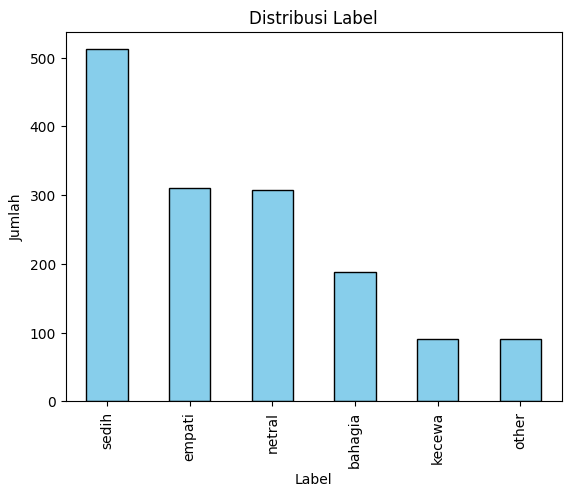

In [ ]:
import matplotlib.pyplot as plt

# Membuat bar plot untuk distribusi label
label_distribution = df['label'].value_counts()

# Membuat plot
label_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menampilkan grafik
plt.show()

## check missing value & duplicate

In [ ]:
df.isnull().sum()

,0
timestamp,0
username,0
comment,0
likeCount,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
# Menampilkan semua baris yang duplikat berdasarkan seluruh kolom
duplicates = df[df.duplicated(keep=False)]
print(duplicates)


                timestamp              username  \
227  2022-03-01T05:33:23Z  @firdhaprblsmnaa1159   
229  2022-03-01T05:33:23Z  @firdhaprblsmnaa1159   

                                               comment  likeCount  label  
227  Ketakutan sm kuliah apa itu wajar? Semua badan...          1  sedih  
229  Ketakutan sm kuliah apa itu wajar? Semua badan...          1  sedih  


In [ ]:
# Menghapus baris duplikat berdasarkan semua kolom
df = df.drop_duplicates()

# **Preprocessing**

## data cleaning & lowercase

In [ ]:
#menghapus kolom yang tidak relevan untuk dilakukan klasifikasi
drop_columns = ['timestamp', 'username','likeCount']
df = df.drop(columns=drop_columns)

In [ ]:
# Menampilkan baris yang memiliki tipe 'int' di kolom 'comment'
int_rows = df[df['comment'].apply(lambda x: isinstance(x, int))]
print(int_rows)


    comment  label
354       0  other
414       0  other


In [ ]:
df['comment'] = df['comment'].apply(lambda x: str(x) if x is not None else '')

In [ ]:
import re
import html

# Fungsi untuk menghapus tag HTML menggunakan regex
def remove_html_tags(text):
    text = html.unescape(text)  # Mengonversi entitas HTML ke karakter asli
    clean_text = re.sub(r'<.*?>', '', text)  # Regex untuk menghapus semua tag HTML
    return clean_text

df['comment_rmv_html'] = df['comment'].apply(remove_html_tags)
df.head(5)

,comment,label,comment_rmv_html
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...


In [ ]:
# Mapping emotikon ke teks
emoticon_map = {
    "💛": "kasih sayang", "🖤": "kasih sayang", "💖": "kasih sayang", "❤": "kasih sayang", "💕": "kasih sayang",
    "💙": "kasih sayang", "❣": "kasih sayang", "♥": "kasih sayang", "💞": "kasih sayang", "💗": "kasih sayang",
    "💚": "kasih sayang", "🤍": "kasih sayang", "💜": "kasih sayang", "🥰": "kasih sayang", "🤞": "kasih sayang",
    "🤗": "kasih sayang", "😘": "kasih sayang",

    "🙏": "terima kasih",

    "😓": "sedih", "🙁": "sedih", "😔": "sedih", "😣": "sedih", "😞": "sedih", "😭": "sedih", "☹": "sedih",
    "😩": "sedih", "😢": "sedih", "😫": "sedih", "😖": "sedih", "😕": "sedih", "🤧": "sedih", "😥": "sedih",
    "😪": "sedih", "🤕": "sedih",

    "🦾": "semangat", "💪": "semangat", "🔥": "semangat", "😉": "semangat", "⭐": "semangat", "🙌": "semangat",
    "🤝": "semangat",

    "😀": "bahagia", "😊": "bahagia", "😍": "bahagia", "😆": "bahagia", "🌻": "bahagia", "✨": "bahagia",
    "😇": "bahagia", "😁": "bahagia", "😗": "bahagia", "😚": "bahagia", "🌹": "bahagia", "👼": "bahagia",
    "🤭": "bahagia", "✌": "bahagia",

    "😑": "tidak senang", "😒": "tidak senang", "🙃": "tidak senang", "🙂": "tidak senang", "🥴": "tidak senang",

    "👍": "setuju",

    "🥺": "memohon",

    "😠": "marah", "😈": "marah",

    "💔": "sakit hati",

    "🤣": "tertawa", "😂": "tertawa", "😅": "tertawa",

    "😶": "terdiam",

    "👉": "menunjuk",

    "🤦": "kecewa",

    "🤲": "berdoa",

    "💡": "ide",

    "🍃": "tenang", "😌": "tenang",

    "👃": "penciuman",

    "🙉": "malu", "😬": "malu",

    # Simbol Teks
    ":)": "senang", ";)": "senang", ":(" : "sedih", ":-)": "senang", ";-)" : "berkedip", ":-(" : "sedih", ";(" : "sedih", ":')" : "sedih",
    ":D": "senang", ":P": "ceria", ":/": "bingung", ":'(": "sedih", ":|": "datar", "-_-": "datar"
}

# Fungsi untuk mengganti emotikon dengan teks dan menambahkan spasi
def replace_emoticons_with_text(text):
    for emoticon, replacement in emoticon_map.items():
        text = text.replace(emoticon, replacement + " ")  # Menambahkan spasi setelah teks
    return text

# Terapkan penggantian emotikon ke setiap komentar
df['comment_emoticon'] = df['comment_rmv_html'].apply(replace_emoticons_with_text)

# Tampilkan hasil
df.head()


,comment,label,comment_rmv_html,comment_emoticon
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re

# Fungsi untuk menghapus URL, mentions, hashtag, tanda baca, dan angka
def remove_noise(text):

    # Menghapus URL
    text = re.sub(r'http\S+|www\S+', '', text)

    # Menghapus mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Menghapus hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Terapkan pembersihan pada kolom 'tweet'
df['comment_clean'] = df['comment_emoticon'].apply(remove_noise)

# Tampilkan DataFrame yang sudah diproses
df


,comment,label,comment_rmv_html,comment_emoticon,comment_clean
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.:58 Penjelasan keseha..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,Tertata sekali... kasih sayang kasih sayang ka...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,"@ lebih baik konsul sama pakarnya, psikiater a..."
...,...,...,...,...,...
1495,cure for your depression: stop using socmeds.....,bahagia,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....
1496,Menerima semua aspek kehidupan dan bertumbuh d...,empati,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...
1497,🖤🖤🖤,empati,🖤🖤🖤,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang
1498,terima kasih terima kasih terima kasih,bahagia,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih


In [ ]:
# Mengecek berapa banyak baris yang kosong setelah pembersihan
empty_rows = df[df['comment_clean'] == '']
print(f"Jumlah baris kosong: {empty_rows.shape[0]}")


Jumlah baris kosong: 1


In [ ]:
# Menampilkan baris yang memiliki NaN atau string kosong di kolom 'comment_clean'
empty_rows = df[df['comment_clean'].isna() | (df['comment_clean'] == '')]

# Tampilkan hasil
empty_rows


,comment,label,comment_rmv_html,comment_emoticon,comment_clean
792,"<a href=""http://www.youtube.com/results?search...",netral,#pilyarindu,#pilyarindu,


In [ ]:
def lowercase(text):
    return text.lower()

df['comment_clean'] = df['comment_clean'].apply(lowercase)

df

,comment,label,comment_rmv_html,comment_emoticon,comment_clean
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...","ingat, kamu juga manusia.:58 penjelasan keseha..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,manungsa = manunggaling rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,tertata sekali... kasih sayang kasih sayang ka...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,"@ lebih baik konsul sama pakarnya, psikiater a..."
...,...,...,...,...,...
1495,cure for your depression: stop using socmeds.....,bahagia,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....
1496,Menerima semua aspek kehidupan dan bertumbuh d...,empati,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...,menerima semua aspek kehidupan dan bertumbuh d...
1497,🖤🖤🖤,empati,🖤🖤🖤,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang
1498,terima kasih terima kasih terima kasih,bahagia,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih


## normalisasi

In [ ]:
import pandas as pd

# Membaca kamus alay dan kamus singkatan
kamus_singkatan = pd.read_csv('kamus_singkatan.csv')

# Menggabungkan kamus alay dan kamus singkatan menjadi satu kamus
kamus2 = kamus_singkatan.set_index('singkatan')['asli'].to_dict()


# Fungsi untuk normalisasi kata singkatan
def normalize_abbreviations(text):
    words = text.split()
    normalized_words = [kamus2[word.lower()] if word.lower() in kamus2 else word for word in words]
    return ' '.join(normalized_words)

# Menerapkan fungsi normalisasi ke kolom teks
df['comment_norm'] = df['comment_clean'].apply(normalize_abbreviations)

# Menampilkan 50 baris pertama setelah normalisasi
df.head()


,comment,label,comment_rmv_html,comment_emoticon,comment_clean,comment_norm
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...","ingat, kamu juga manusia.:58 penjelasan keseha...","ingat, kamu juga manusia.:58 penjelasan keseha..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,manungsa = manunggaling rasa,manungsa = manunggaling rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,tertata sekali... kasih sayang kasih sayang ka...,tertata sekali... kasih sayang kasih sayang ka...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,"@ lebih baik konsul sama pakarnya, psikiater a...","@ lebih baik konsul sama pakarnya, psikiater a..."


## tokenizing dan split data

In [ ]:
from sklearn.model_selection import train_test_split

df_small = df[['comment_norm', 'label']]
df_small['label'] = df_small['label'].astype('category').cat.codes
print(df_small['label'].value_counts())
print("Num classes:", df_small['label'].nunique())

train_val_df, test_df = train_test_split(df_small, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

label
5    511
1    311
3    307
0    188
2     91
4     91
Name: count, dtype: int64
Num classes: 6


/tmp/ipython-input-2997159195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['label'] = df_small['label'].astype('category').cat.codes


# **IndoBERT lite base p1**

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(
    "indobenchmark/indobert-lite-base-p1"
)

def tokenize_indobert(text_list):
    return tokenizer(
        text_list,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
import torch
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification

class SentimentDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        encoding = self.tokenizer(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
# Prepare DataLoader for training data
MAX_LEN = 128
BATCH_SIZE = 16

train_dataset = SentimentDataset(
    reviews=train_df.comment_norm.to_numpy(),
    targets=train_df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Prepare DataLoader for validation data
val_dataset = SentimentDataset(
    reviews=train_df.comment_norm.to_numpy(),
    targets=train_df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Prepare DataLoader for test data
test_dataset = SentimentDataset(
    reviews=train_df.comment_norm.to_numpy(),
    targets=train_df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
# Define model
num_labels = df_small['label'].nunique()
model = AutoModelForSequenceClassification.from_pretrained('indobenchmark/indobert-lite-base-p1', num_labels=num_labels)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print("Vocab size model:", model.config.vocab_size)
for batch in train_loader:
    print("MAX TOKEN ID:", batch['input_ids'].max().item())
    print("SHAPE:", batch['input_ids'].shape)
    break


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Vocab size model: 30000
MAX TOKEN ID: 29955
SHAPE: torch.Size([16, 128])


In [ ]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=3e-5)

In [ ]:
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
# Parameters
EPOCHS = 10
loss_fn = CrossEntropyLoss().to(device)

# Lists to store loss and accuracy
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    total_train_loss = 0
    correct_train_predictions = 0
    total_train_samples = 0

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        targets = batch['targets'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Calculate accuracy
        predictions = outputs.logits.argmax(dim=-1)
        correct_train_predictions += (predictions == targets).sum().item()
        total_train_samples += targets.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct_train_predictions / total_train_samples
    train_accuracies.append(train_accuracy)

    model.eval()
    total_val_loss = 0
    correct_val_predictions = 0
    total_val_samples = 0

    for batch in tqdm(val_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        targets = batch['targets'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
            loss = outputs.loss

        total_val_loss += loss.item()

        # Calculate accuracy
        predictions = outputs.logits.argmax(dim=-1)
        correct_val_predictions += (predictions == targets).sum().item()
        total_val_samples += targets.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accuracy = correct_val_predictions / total_val_samples
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1} - Train Loss: {avg_train_loss} - Validation Loss: {avg_val_loss}")
    print(f"Epoch {epoch + 1} - Train Accuracy: {train_accuracy} - Validation Accuracy: {val_accuracy}")

Evaluating: 100%|██████████| 60/60 [05:35<00:00,  5.59s/it]


Epoch 1 - Train Loss: 1.5037898540496826 - Validation Loss: 1.225998807946841
Epoch 1 - Train Accuracy: 0.4129301355578728 - Validation Accuracy: 0.6141814389989573


Evaluating: 100%|██████████| 60/60 [05:36<00:00,  5.62s/it]


Epoch 2 - Train Loss: 1.1282155831654868 - Validation Loss: 0.8590872079133988
Epoch 2 - Train Accuracy: 0.6329509906152242 - Validation Accuracy: 0.7278415015641293


Evaluating: 100%|██████████| 60/60 [05:36<00:00,  5.61s/it]


Epoch 3 - Train Loss: 0.8295943210522334 - Validation Loss: 0.5984556491176287
Epoch 3 - Train Accuracy: 0.7299270072992701 - Validation Accuracy: 0.8196037539103233


Evaluating: 100%|██████████| 60/60 [05:34<00:00,  5.58s/it]


Epoch 4 - Train Loss: 0.5887709120909373 - Validation Loss: 0.3984369729955991
Epoch 4 - Train Accuracy: 0.8039624608967675 - Validation Accuracy: 0.8821689259645464


Evaluating: 100%|██████████| 60/60 [05:36<00:00,  5.60s/it]


Epoch 5 - Train Loss: 0.3876381864150365 - Validation Loss: 0.2798333009084066
Epoch 5 - Train Accuracy: 0.8852971845672576 - Validation Accuracy: 0.9343065693430657


Evaluating: 100%|██████████| 60/60 [05:35<00:00,  5.60s/it]


Epoch 6 - Train Loss: 0.2645736150443554 - Validation Loss: 0.19818176285674174
Epoch 6 - Train Accuracy: 0.9301355578727841 - Validation Accuracy: 0.9457768508863399


Evaluating: 100%|██████████| 60/60 [05:37<00:00,  5.63s/it]


Epoch 7 - Train Loss: 0.20317400321364404 - Validation Loss: 0.14510662121077378
Epoch 7 - Train Accuracy: 0.9436913451511991 - Validation Accuracy: 0.9676746611053181


Evaluating: 100%|██████████| 60/60 [05:35<00:00,  5.58s/it]


Epoch 8 - Train Loss: 0.14721868050595124 - Validation Loss: 0.09949819582204024
Epoch 8 - Train Accuracy: 0.9655891553701773 - Validation Accuracy: 0.9781021897810219


Evaluating: 100%|██████████| 60/60 [05:34<00:00,  5.57s/it]


Epoch 9 - Train Loss: 0.12444753628224134 - Validation Loss: 0.10309970678451161
Epoch 9 - Train Accuracy: 0.9655891553701773 - Validation Accuracy: 0.9708029197080292


Evaluating: 100%|██████████| 60/60 [05:38<00:00,  5.65s/it]

Epoch 10 - Train Loss: 0.10585411035766204 - Validation Loss: 0.08008777005597949
Epoch 10 - Train Accuracy: 0.9697601668404588 - Validation Accuracy: 0.9791449426485923


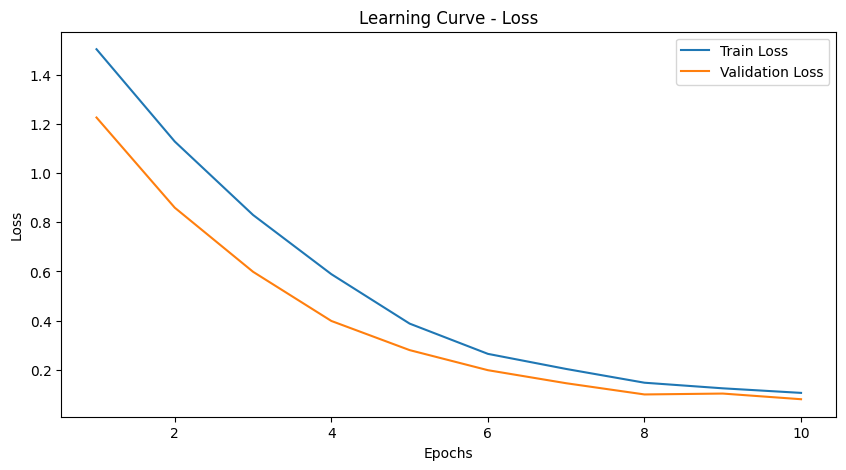

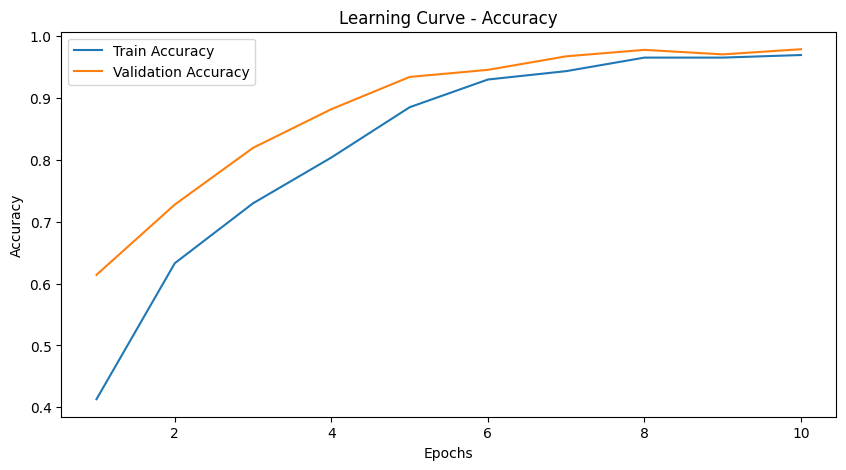

In [ ]:
# Plotting learning curve for loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve - Loss')
plt.show()

# Plotting learning curve for accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

model.eval()

all_predictions = []
all_targets = []

for batch in tqdm(val_loader, desc="Generating Classification Report"):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    targets = batch['targets'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=-1)

    all_predictions.extend(preds.cpu().numpy())
    all_targets.extend(targets.cpu().numpy())

# Generate classification report
print(classification_report(all_targets, all_predictions))


Generating Classification Report: 100%|██████████| 60/60 [06:01<00:00,  6.02s/it]

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       124
           1       0.99      0.98      0.98       199
           2       1.00      0.90      0.95        52
           3       0.99      0.97      0.98       193
           4       0.93      0.96      0.95        55
           5       0.97      1.00      0.98       336

    accuracy                           0.98       959
   macro avg       0.98      0.97      0.97       959
weighted avg       0.98      0.98      0.98       959



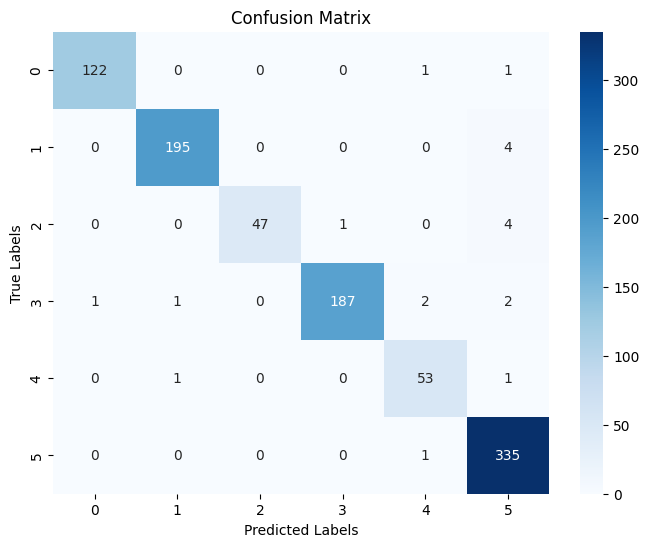

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(all_targets, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_text(text, model, tokenizer, device):
    model.eval()

    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = outputs.logits.argmax(dim=-1).item()

    return preds


In [ ]:
text = "💚"
pred = predict_text(text, model, tokenizer, device)
print("Prediksi kelas:", pred)

Prediksi kelas: 4


In [ ]:
# 5    511  sedih
# 1    311 empati
# 3    307 netral
# 0    188 bahagia
# 2     91 kecewa
# 4     91 other